<a href="https://colab.research.google.com/github/bewww831/bewww831.github.io/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance

In [3]:
import requests
import pandas as pd
from io import StringIO
import yfinance as yf

In [4]:
data = yf.download("AAPL", start="2020-01-01", end="2025-11-01")

/tmp/ipython-input-3436828626.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2025-11-01")
[*********************100%***********************]  1 of 1 completed


In [5]:
df = data[["Open", "High", "Low", "Close"]].copy()
df.reset_index(inplace=True)  # moves Date from index into a column

In [7]:
df.head()

Price,Date,Open,High,Low,Close
Ticker,,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,71.476607,72.528589,71.223267,72.468269
1,2020-01-03,71.696167,72.523754,71.539337,71.763725
2,2020-01-06,70.885464,72.374154,70.634532,72.335548
3,2020-01-07,72.345212,72.600968,71.775796,71.995361
4,2020-01-08,71.698581,73.455095,71.698581,73.153496


In [8]:
df.columns = df.columns.droplevel(1)

In [9]:
df.head()

Price,Date,Open,High,Low,Close
0,2020-01-02,71.476607,72.528589,71.223267,72.468269
1,2020-01-03,71.696167,72.523754,71.539337,71.763725
2,2020-01-06,70.885464,72.374154,70.634532,72.335548
3,2020-01-07,72.345212,72.600968,71.775796,71.995361
4,2020-01-08,71.698581,73.455095,71.698581,73.153496


In [10]:
print(df["Date"].dtype)


datetime64[ns]


In [11]:
df = df[['Date', 'Close']]

df

Price,Date,Close
0,2020-01-02,72.468269
1,2020-01-03,71.763725
2,2020-01-06,72.335548
3,2020-01-07,71.995361
4,2020-01-08,73.153496
...,...,...
1462,2025-10-27,268.549652
1463,2025-10-28,268.739471
1464,2025-10-29,269.438812
1465,2025-10-30,271.137146


In [12]:
df['Date']

,Date
0,2020-01-02
1,2020-01-03
2,2020-01-06
3,2020-01-07
4,2020-01-08
...,...
1462,2025-10-27
1463,2025-10-28
1464,2025-10-29
1465,2025-10-30


In [13]:
df.index = df.pop('Date')
df

Price,Close
Date,
2020-01-02,72.468269
2020-01-03,71.763725
2020-01-06,72.335548
2020-01-07,71.995361
2020-01-08,73.153496
...,...
2025-10-27,268.549652
2025-10-28,268.739471
2025-10-29,269.438812


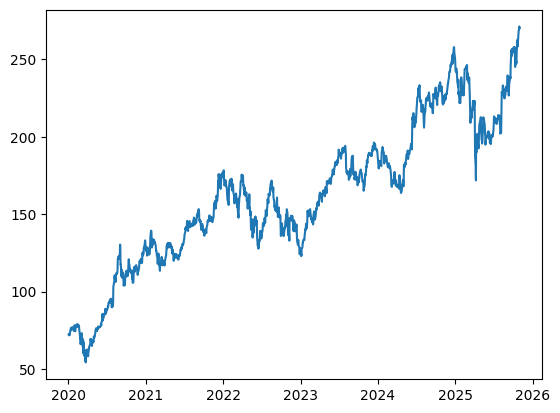

In [14]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [43]:
import numpy as np
import pandas as pd

def df_to_windowed_df(dataframe, first_date, last_date, n=3):

    # Make sure these are timestamps (pandas handles strings nicely)
    first_date = pd.to_datetime(first_date)
    last_date  = pd.to_datetime(last_date)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        # Take all data up to target_date, then keep the last n+1 rows
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]   # first n as features, last as target

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Look ahead up to 7 days and take the *next* timestamp in the index
        next_week = dataframe.loc[target_date:target_date + pd.Timedelta(days=7)]

        if len(next_week) < 2:
            # no "next" row found
            break

        # second row in that range = next date
        next_date = next_week.index[1]

        if last_time:
            break

        target_date = next_date

        if target_date >= last_date:
            last_time = True

    # Build the windowed dataframe
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df


# Example usage
windowed_df = df_to_windowed_df(
    df,
    '2020-01-07',
    '2025-11-01',
    n=3
)

windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2020-01-07,72.468269,71.763725,72.335548,71.995361
1,2020-01-08,71.763725,72.335548,71.995361,73.153496
2,2020-01-09,72.335548,71.995361,73.153496,74.707344
3,2020-01-10,71.995361,73.153496,74.707344,74.876236
4,2020-01-13,73.153496,74.707344,74.876236,76.475914
...,...,...,...,...,...
1459,2025-10-27,258.199707,259.328583,262.565491,268.549652
1460,2025-10-28,259.328583,262.565491,268.549652,268.739471
1461,2025-10-29,262.565491,268.549652,268.739471,269.438812
1462,2025-10-30,268.549652,268.739471,269.438812,271.137146


In [25]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1464,), (1464, 3, 1), (1464,))

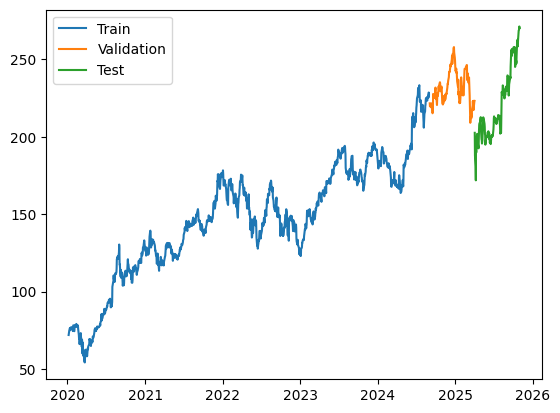

In [27]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 22908.7695 - mean_absolute_error: 146.8298 - val_loss: 52152.8477 - val_mean_absolute_error: 228.1272
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21490.4004 - mean_absolute_error: 142.1040 - val_loss: 45752.7930 - val_mean_absolute_error: 213.6373
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15360.2607 - mean_absolute_error: 117.6873 - val_loss: 26639.9414 - val_mean_absolute_error: 162.8774
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5191.9434 - mean_absolute_error: 62.8528 - val_loss: 8656.4746 - val_mean_absolute_error: 92.4422
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1179.2074 - mean_absolute_error: 26.9072 - val_loss: 5478.0947 - val_mean_absolute_error: 73.2856
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 321.1498 - mean_absolute_error: 12.2041 - val_loss: 2767.9414 - val_mean_absolute_error: 51.5656
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


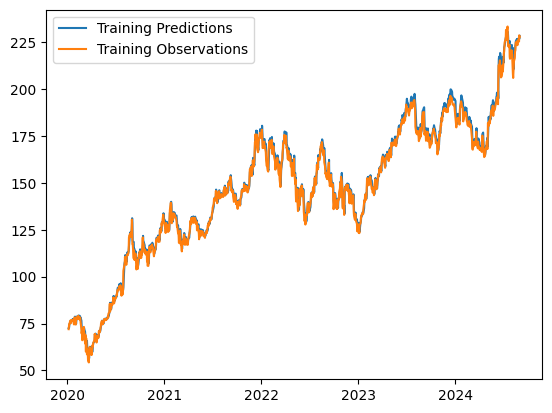

In [46]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


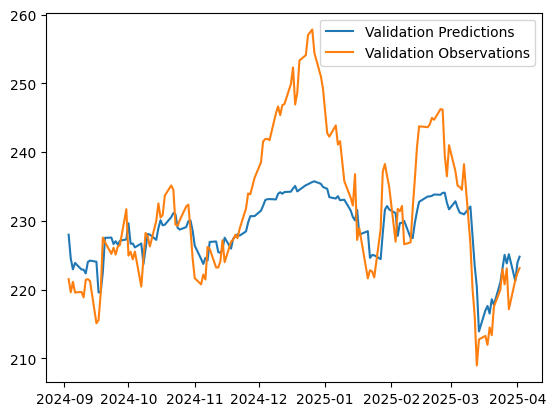

In [48]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


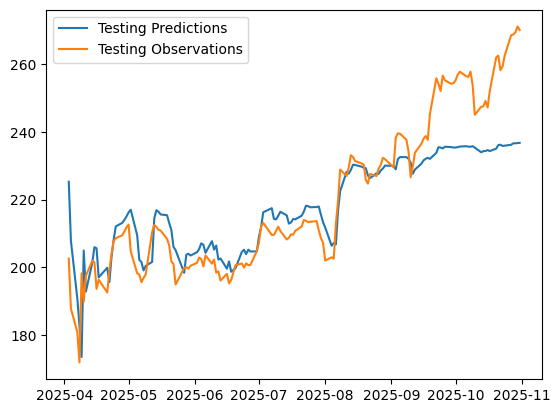

In [49]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

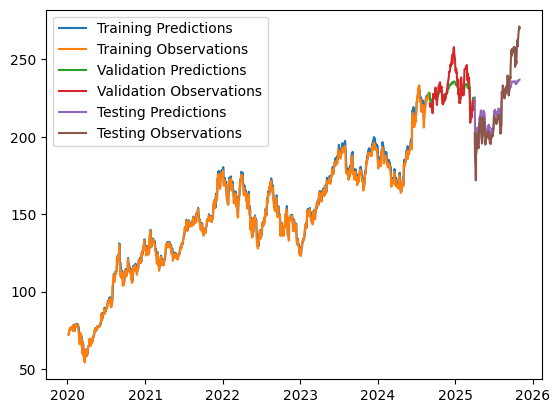

In [50]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MAE : 8.433736801147461
MSE : 138.6262664794922
RMSE: 11.773965622486427
R²  : 0.7350908517837524


In [53]:
# Assuming df already has DateTimeIndex and at least OHLCV
df['ma7']  = df['Close'].rolling(window=7).mean()
df['ma30'] = df['Close'].rolling(window=30).mean()

# Drop initial NaNs from moving averages
df = df.dropna()


In [54]:
df.head()

Price,Close,ma7,ma30
Date,,,
2020-02-13,78.570442,78.027986,75.934633
2020-02-14,78.589806,78.175207,76.138684
2020-02-18,77.150787,77.987253,76.318253
2020-02-19,78.268143,78.111289,76.516006
2020-02-20,77.465210,78.068103,76.698334


In [55]:
import numpy as np
import pandas as pd

def df_to_windowed_X_y(dataframe, first_date, last_date, feature_cols, n=3):
    """
    dataframe: must have DatetimeIndex
    feature_cols: list of columns to use as features, e.g.
                  ['Open','High','Low','Close','Volume','ma7','ma30']
    first_date, last_date: strings or Timestamps
    n: window size (timesteps)
    """

    first_date = pd.to_datetime(first_date)
    last_date  = pd.to_datetime(last_date)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        # Last n+1 rows up to target_date
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return None, None, None

        # X: first n rows, all feature columns
        x = df_subset.iloc[:-1][feature_cols].to_numpy()      # shape (n, num_features)

        # y: last row's Close (next value)
        y = df_subset.iloc[-1]['Close']                       # scalar

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Find the next date (second row in the next_week slice)
        next_week = dataframe.loc[target_date:target_date + pd.Timedelta(days=7)]
        if len(next_week) < 2:
            break

        next_date = next_week.index[1]

        if last_time:
            break

        target_date = next_date

        if target_date >= last_date:
            last_time = True

    X = np.array(X, dtype=np.float32)   # (samples, n, num_features)
    Y = np.array(Y, dtype=np.float32)   # (samples,)

    return np.array(dates), X, Y


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.GRU(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 22425.5820 - mean_absolute_error: 145.2721 - val_loss: 50733.7930 - val_mean_absolute_error: 224.9954
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19683.4355 - mean_absolute_error: 134.9855 - val_loss: 40406.8008 - val_mean_absolute_error: 200.7352
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10738.9180 - mean_absolute_error: 94.9196 - val_loss: 12301.2529 - val_mean_absolute_error: 110.3819
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1630.2991 - mean_absolute_error: 32.3154 - val_loss: 6713.6821 - val_mean_absolute_error: 81.2798
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 755.0964 - mean_absolute_error: 21.0570 - val_loss: 3589.3738 - val_mean_absolute_error: 59.0009
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90.0722 - mean_absolute_error: 5.2588 - val_loss: 1711.4213 - val_mean_absolute_error: 40.0564
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step
MAE : 7.768993377685547
MSE : 146.14596557617188
RMSE: 12.089084563198815
R²  : 0.7207210063934326


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


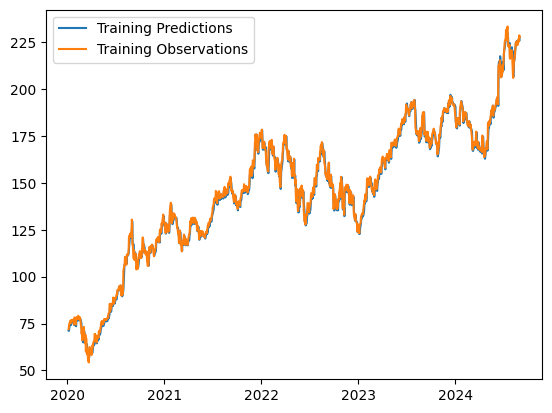

In [59]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


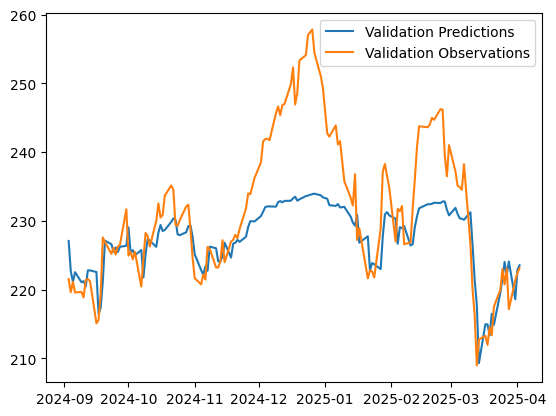

In [60]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


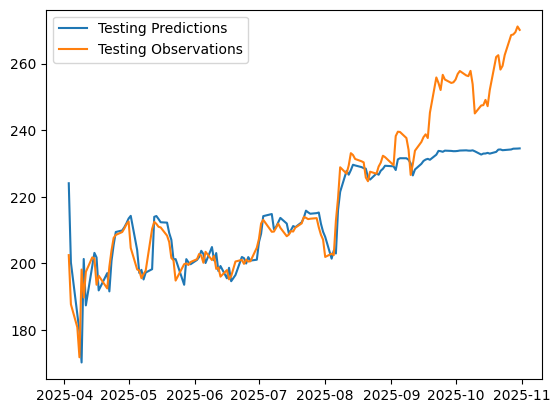

In [61]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])